In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
import pandas as pd 
import numpy as np
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation.csv']))
print('Sample data :\n', df2.head())
print(20*'--')
print('Info data "\n', df2.info())
print(20*'--', '\n\n')   

#Cek missing value dan data duplicate 
print('Mising value setiap kolom :\n', df2.isna().sum())
print(20*'--') 
print(f'jumlah data duplikat : {df2.duplicated().sum()}')
print(20*'--', '\n\n') 

Sample data :
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), in

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns  

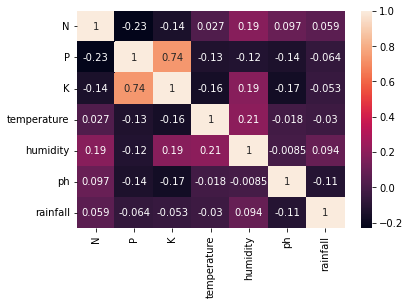

In [4]:
#Buat Grafik korelasi 
sns.heatmap(df2.corr(), annot=True)
plt.show()

Text(0, 0.5, '')

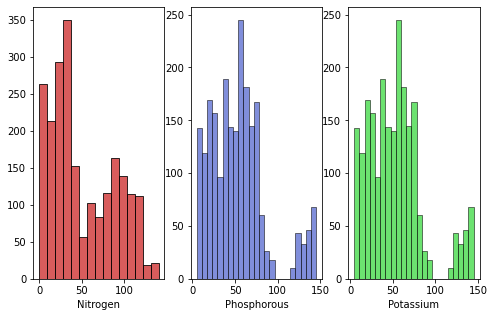

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(8,5)) 
sns.histplot(df2['N'], ax=axs[0], color='#cc2525')
sns.histplot(df2['P'], ax=axs[1], color='#5569cf')
sns.histplot(df2['P'], ax=axs[2], color='#3bd940')
axs[0].set_xlabel('Nitrogen')
axs[1].set_xlabel('Phosphorous')
axs[2].set_xlabel('Potassium')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

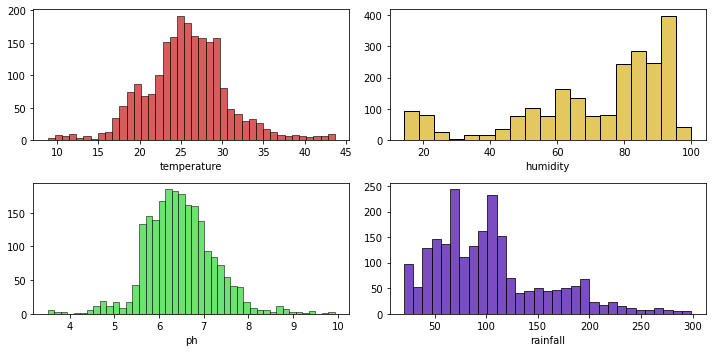

In [6]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) 
sns.histplot(df2['temperature'], ax=axs2[0,0], color='#cc2525')
sns.histplot(df2['humidity'], ax=axs2[0,1], color='#d9b629')
sns.histplot(df2['ph'], ax=axs2[1,0], color='#3bd940')
sns.histplot(df2['rainfall'], ax=axs2[1,1], color='#4d13ab')
axs2[0,0].set_xlabel('temperature')
axs2[0,1].set_xlabel('humidity')
axs2[1,0].set_xlabel('ph')
axs2[1,1].set_xlabel('rainfall')
axs2[0,0].set_ylabel('')
axs2[0,1].set_ylabel('')
axs2[1,0].set_ylabel('')
axs2[1,1].set_ylabel('')
fig2.tight_layout()
plt.show() 

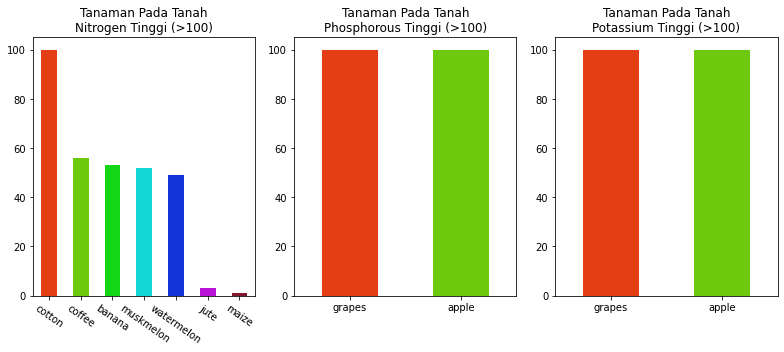

In [7]:
df_n_tinggi = df2[(df2['N'] >= 100)]
df_p_tinggi = df2[(df2['P'] >= 100)] 
df_k_tinggi = df2[(df2['K'] >= 100)]

my_color = ['#e33e14', '#6cc90e', '#13d617', '#13d6d6', '#1334d6', '#b613d6', '#80192e']
fig, ax = plt.subplots(1, 3, figsize=(11,5))
df_n_tinggi['label'].value_counts().plot(kind="bar", ax=ax[0], rot=-35, color = my_color).set_title('Tanaman Pada Tanah\nNitrogen Tinggi (>100)') 
df_p_tinggi['label'].value_counts().plot(kind="bar", ax=ax[1], rot=0, color = my_color).set_title('Tanaman Pada Tanah\nPhosphorous Tinggi (>100)') 
df_k_tinggi['label'].value_counts().plot(kind="bar", ax=ax[2], rot=0, color = my_color).set_title('Tanaman Pada Tanah\nPotassium Tinggi (>100)')
plt.tight_layout()
plt.show() 

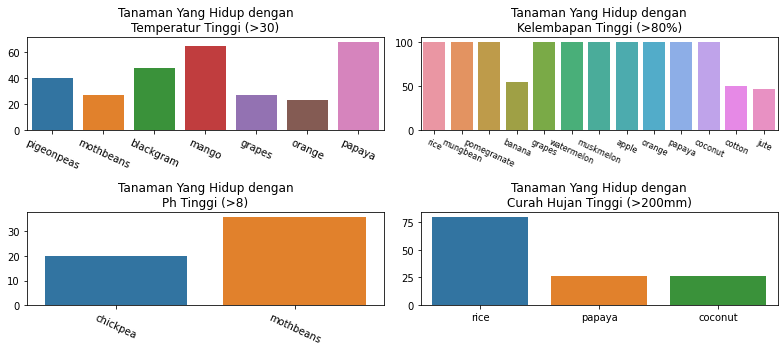

In [8]:
#temperature, ph, humidity, rainfall 
df_temperature_tinggi = df2[(df2['temperature'] >= 30)]
df_humidity_tinggi = df2[(df2['humidity'] >= 80)] 
df_ph_tinggi = df2[(df2['ph'] >= 8)] 
df_rainfall_tinggi = df2[(df2['rainfall'] >= 200)]

fig3, ax3 = plt.subplots(2, 2, figsize=(11,5)) 
sns.countplot(data=df_temperature_tinggi, x='label', ax=ax3[0,0]) 
sns.countplot(data=df_humidity_tinggi, x='label', ax=ax3[0,1])
sns.countplot(data=df_ph_tinggi, x='label', ax=ax3[1,0])
sns.countplot(data=df_rainfall_tinggi, x='label', ax=ax3[1,1])

ax3[0,0].set_xticklabels(ax3[0,0].get_xticklabels(), rotation=-25)
ax3[0,1].set_xticklabels(ax3[0,1].get_xticklabels(), rotation=-25, fontsize=8)
ax3[1,0].set_xticklabels(ax3[1,0].get_xticklabels(), rotation=-25) 

ax3[0,0].set_title('Tanaman Yang Hidup dengan\nTemperatur Tinggi (>30)')
ax3[0,0].set_ylabel('') 
ax3[0,0].set_xlabel('') 

ax3[0,1].set_title('Tanaman Yang Hidup dengan\nKelembapan Tinggi (>80%)')
ax3[0,1].set_ylabel('') 
ax3[0,1].set_xlabel('') 

ax3[1,0].set_title('Tanaman Yang Hidup dengan\nPh Tinggi (>8)')
ax3[1,0].set_ylabel('') 
ax3[1,0].set_xlabel('') 

ax3[1,1].set_title('Tanaman Yang Hidup dengan\nCurah Hujan Tinggi (>200mm)')
ax3[1,1].set_ylabel('') 
ax3[1,1].set_xlabel('')

fig3.tight_layout() 
plt.show()

In [ ]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df2['label'] = LE.fit_transform(df2['label'])
print(LE.classes_)
print(np.sort(df2['label'].unique()))
print(20*'--') 

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
----------------------------------------


In [ ]:
# Membagi data features dan label 
X = df2[['N','P','K','temperature','humidity','ph','rainfall']] 
y = df2['label']

# Bagi data ke training dan testing 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) 

In [ ]:
# Import library untuk uji peforma 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Model Decision Tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
print('Akurasi Decision tree (train): ', "{:.0%}". format(accuracy)) 
print('Akurasi Decision (test): ', "{:.0%}". format(accuracy_score(y_train, tree.predict(X_train)))) 
print(20*'--')  

# Model KNN 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_knn)
print('Akurasi KNN (train): ', "{:.0%}". format(accuracy)) 
print('Akurasi KNN (test): ', "{:.0%}". format(accuracy_score(y_train, knn.predict(X_train)))) 
print(20*'--')  

# Model Random Forest 
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train) 
y_pred_forest = forest.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_forest)
print('Akurasi Random Forest (train): ', "{:.0%}". format(accuracy)) 
print('Akurasi Random Forest (test): ', "{:.0%}". format(accuracy_score(y_train, forest.predict(X_train)))) 
print(20*'--')  

Akurasi Decision tree (train):  99%
Akurasi Decision (test):  100%
----------------------------------------
Akurasi KNN (train):  98%
Akurasi KNN (test):  99%
----------------------------------------
Akurasi Random Forest (train):  100%
Akurasi Random Forest (test):  100%
----------------------------------------


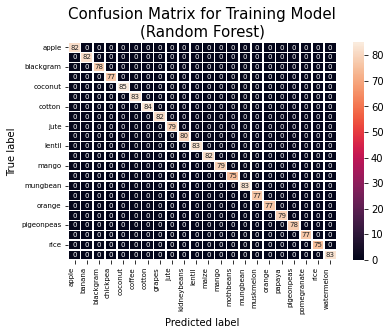

In [ ]:
#Membuat Plot Confusion Matrix Untuk Training 
lab = 'apple','banana','blackgram','chickpea','coconut','coffee','cotton','grapes','jute','kidneybeans','lentil','maize','mango','mothbeans','mungbean','muskmelon','orange','papaya','pigeonpeas','pomegranate','rice','watermelon'

confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, forest.predict(X_train))), (lab), (lab))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 7}, linewidths=.5)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=7)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=7)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=15)
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show() 


Text(0.5, 15.0, 'Predicted label')

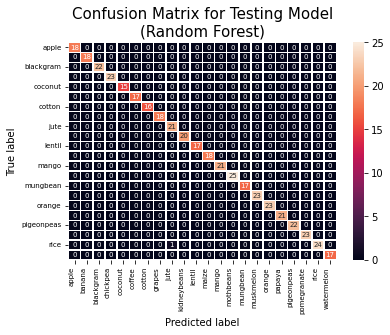

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_forest)), (lab), (lab))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 7}, linewidths=.5)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=7)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=7)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=15)
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)

In [ ]:
import numpy

class QDA:
    def fit(self, X, t):
        self.priors = dict()
        self.means = dict()
        self.covs = dict()
        
        self.classes = np.unique(t)

        for c in self.classes:
            X_c = X[t == c]
            self.priors[c] = X_c.shape[0] / X.shape[0]
            self.means[c] = np.mean(X_c, axis=0)
            self.covs[c] = np.cov(X_c, rowvar=False)

    def predict(self, X):
        preds = list()
        for x in X:
            posts = list()
            for c in self.classes:
                prior = np.log(self.priors[c])
                inv_cov = np.linalg.inv(self.covs[c])
                inv_cov_det = np.linalg.det(inv_cov)
                diff = x-self.means[c]
                likelihood = 0.5*np.log(inv_cov_det) - 0.5*diff.T @ inv_cov @ diff
                post = prior + likelihood
                posts.append(post)
            pred = self.classes[np.argmax(posts)]
            preds.append(pred)
        return np.array(preds)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation (1).csv


In [ ]:
import pandas as pd 
import numpy as np
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation.csv']))


In [ ]:
class QDA:
    
    ## Fitting the model
    
    def fit(self, X, y):
        
        ## Record info
        self.N, self.D = X.shape
        self.X = X
        self.y = y
        
        
        ## Get prior probabilities 
        self.unique_y, unique_y_counts = np.unique(self.y, return_counts = True) # returns unique y and counts
        self.pi_ks = unique_y_counts/self.N
        
        
        ## Get mu and Sigma for each class
        self.mu_ks = []
        self.Sigma_ks = []
        for i, k in enumerate(self.unique_y):
            
            X_k = self.X[self.y == k]
            mu_k = X_k.mean(0).reshape(self.D, 1)
            self.mu_ks.append(mu_k)
            
            Sigma_k = np.zeros((self.D, self.D))
            for x_n in X_k:
                x_n = x_n.reshape(-1,1)
                x_n_minus_mu_k = (x_n - mu_k)
                Sigma_k += np.dot(x_n_minus_mu_k, x_n_minus_mu_k.T)
            self.Sigma_ks.append(Sigma_k/len(X_k))
     
    ## Making classifications 
    
    def _mvn_density(self, x_n, mu_k, Sigma_k):
        x_n_minus_mu_k = (x_n - mu_k)
        density = np.linalg.det(Sigma_k)**(-1/2) * np.exp(-(1/2)*x_n_minus_mu_k.T @ np.linalg.inv(Sigma_k) @ x_n_minus_mu_k)
        return density
    
    def classify(self, X_test):
        
        y_n = np.empty(len(X_test))
        for i, x_n in enumerate(X_test):
            
            x_n = x_n.reshape(-1, 1)
            p_ks = np.empty(len(self.unique_y))
        
            for j, k in enumerate(self.unique_y):

                p_x_given_y = self._mvn_density(x_n, self.mu_ks[j], self.Sigma_ks[j])
                p_y_given_x = self.pi_ks[j]*p_x_given_y
                p_ks[j] = p_y_given_x
            
            y_n[i] = self.unique_y[np.argmax(p_ks)]
        
        return y_n
            

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) 


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Model Decision Tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
print('Akurasi Decision tree (train): ', "{:.0%}". format(accuracy)) 
print('Akurasi Decision (test): ', "{:.0%}". format(accuracy_score(y_train, tree.predict(X_train)))) 
print(20*'--')  

# Model KNN 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_knn)
print('Akurasi KNN (train): ', "{:.0%}". format(accuracy)) 
print('Akurasi KNN (test): ', "{:.0%}". format(accuracy_score(y_train, knn.predict(X_train)))) 
print(20*'--')  

# Model Random Forest 
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train) 
y_pred_forest = forest.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_forest)
print('Akurasi Random Forest (train): ', "{:.0%}". format(accuracy)) 
print('Akurasi Random Forest (test): ', "{:.0%}". format(accuracy_score(y_train, forest.predict(X_train)))) 
print(20*'--')  

Akurasi Decision tree (train):  99%
Akurasi Decision (test):  100%
----------------------------------------
Akurasi KNN (train):  98%
Akurasi KNN (test):  99%
----------------------------------------
Akurasi Random Forest (train):  100%
Akurasi Random Forest (test):  100%
----------------------------------------


In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1567,27,120,200,21.452787,90.745319,6.110219,116.703658
2031,81,36,38,23.765547,87.983299,6.334838,150.316615
2073,90,59,35,24.251335,89.864541,7.098228,175.174211
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
279,47,80,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829
